<a href="https://colab.research.google.com/github/951237/TIL/blob/master/TIL_200523_%EC%95%84%EB%B3%B4%EC%B9%B4%EB%8F%84_%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아보카도 가격예측 프로그램 

## 데이터 정제하기

### 라이브러리 호출 및 도움함수 설정

In [0]:
import numpy as np
import pandas as pd

# 데이터 프레임 살펴보기
def df_info(df):
    print(df.head(), '\n')
    print(df.tail(), '\n')
    print(df.columns, '\n')
    print(df.info())

# 데이터프레임의 칼럼별 데이터값 확인 
def df_unique(df, num):     # 데이터프레임 이름과, 칼럼내의 유니크 데이터 갯수
    col = df.columns.to_list()
    for i in col:
        v_unique = df[i].unique()
        if len(v_unique) < num:
            print(f'{i} : {len(v_unique)}개','\n', f'{df[i].unique()}', '\n')
        else:
            pass

### 데이터 프레임 만들기 

In [74]:
FILE_URL = '/content/drive/My Drive/data/dataset/avocado.csv' # 데이터셋 링크
df = pd.read_csv(FILE_URL)      # csv파일 불러와서 데이터 프레임 만들기
df_info(df)

   Unnamed: 0        Date  AveragePrice  ...          type  year  region
0           0  2015-12-27          1.33  ...  conventional  2015  Albany
1           1  2015-12-20          1.35  ...  conventional  2015  Albany
2           2  2015-12-13          0.93  ...  conventional  2015  Albany
3           3  2015-12-06          1.08  ...  conventional  2015  Albany
4           4  2015-11-29          1.28  ...  conventional  2015  Albany

[5 rows x 14 columns] 

       Unnamed: 0        Date  AveragePrice  ...     type  year            region
18244           7  2018-02-04          1.63  ...  organic  2018  WestTexNewMexico
18245           8  2018-01-28          1.71  ...  organic  2018  WestTexNewMexico
18246           9  2018-01-21          1.87  ...  organic  2018  WestTexNewMexico
18247          10  2018-01-14          1.93  ...  organic  2018  WestTexNewMexico
18248          11  2018-01-07          1.62  ...  organic  2018  WestTexNewMexico

[5 rows x 14 columns] 

Index(['Unnamed: 0',

In [75]:
df.describe() # 데이터프레임 요약보기 

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [76]:
df.groupby('type').mean()   # 타입을 그룹으로 묶어서 평균값 보기

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [117]:
df_unique(df, 100)

Unnamed: 0 : 53개 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52] 

type : 2개 
 ['conventional' 'organic'] 

year : 4개 
 [2015 2016 2017 2018] 

region : 54개 
 ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMex

In [119]:
df = df.loc[ (df.type == 'conventional') & (df.region == 'TotalUS') ]   # 유형의 값과 지역의 값을 선택하여 필터링하기
df_info(df)

      Unnamed: 0        Date  AveragePrice  ...          type  year   region
2652           0  2015-12-27          0.95  ...  conventional  2015  TotalUS
2653           1  2015-12-20          0.98  ...  conventional  2015  TotalUS
2654           2  2015-12-13          0.93  ...  conventional  2015  TotalUS
2655           3  2015-12-06          0.89  ...  conventional  2015  TotalUS
2656           4  2015-11-29          0.99  ...  conventional  2015  TotalUS

[5 rows x 14 columns] 

      Unnamed: 0        Date  AveragePrice  ...          type  year   region
9097           7  2018-02-04          0.87  ...  conventional  2018  TotalUS
9098           8  2018-01-28          1.09  ...  conventional  2018  TotalUS
9099           9  2018-01-21          1.08  ...  conventional  2018  TotalUS
9100          10  2018-01-14          1.20  ...  conventional  2018  TotalUS
9101          11  2018-01-07          1.13  ...  conventional  2018  TotalUS

[5 rows x 14 columns] 

Index(['Unnamed: 0', 'Date

In [121]:
df['Date'] = pd.to_datetime(df['Date'])     # Date의 스트링 값을 날짜 값으로 변환하기
df_info(df)

      Unnamed: 0       Date  AveragePrice  ...          type  year   region
2652           0 2015-12-27          0.95  ...  conventional  2015  TotalUS
2653           1 2015-12-20          0.98  ...  conventional  2015  TotalUS
2654           2 2015-12-13          0.93  ...  conventional  2015  TotalUS
2655           3 2015-12-06          0.89  ...  conventional  2015  TotalUS
2656           4 2015-11-29          0.99  ...  conventional  2015  TotalUS

[5 rows x 14 columns] 

      Unnamed: 0       Date  AveragePrice  ...          type  year   region
9097           7 2018-02-04          0.87  ...  conventional  2018  TotalUS
9098           8 2018-01-28          1.09  ...  conventional  2018  TotalUS
9099           9 2018-01-21          1.08  ...  conventional  2018  TotalUS
9100          10 2018-01-14          1.20  ...  conventional  2018  TotalUS
9101          11 2018-01-07          1.13  ...  conventional  2018  TotalUS

[5 rows x 14 columns] 

Index(['Unnamed: 0', 'Date', 'AverageP

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
data = df[ ['Date', 'AveragePrice'] ].reset_index(drop = True)      # 데이터 프레임내 칼럼을 선택하여 최종 데이터 만들기 / 데이터프레임 인덱스 리셋하기
df_info(data)

        Date  AveragePrice
0 2015-12-27          0.95
1 2015-12-20          0.98
2 2015-12-13          0.93
3 2015-12-06          0.89
4 2015-11-29          0.99 

          Date  AveragePrice
164 2018-02-04          0.87
165 2018-01-28          1.09
166 2018-01-21          1.08
167 2018-01-14          1.20
168 2018-01-07          1.13 

Index(['Date', 'AveragePrice'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB
None


In [124]:
data = data.rename( columns={ 'Date' : 'ds', 'y' : 'y' } )  # 데이터프레임 칼럼 이름 바꾸기
df_info(data)

          ds  AveragePrice
0 2015-12-27          0.95
1 2015-12-20          0.98
2 2015-12-13          0.93
3 2015-12-06          0.89
4 2015-11-29          0.99 

            ds  AveragePrice
164 2018-02-04          0.87
165 2018-01-28          1.09
166 2018-01-21          1.08
167 2018-01-14          1.20
168 2018-01-07          1.13 

Index(['ds', 'AveragePrice'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            169 non-null    datetime64[ns]
 1   AveragePrice  169 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB
None


### 데이터값 그래프로 표현하기

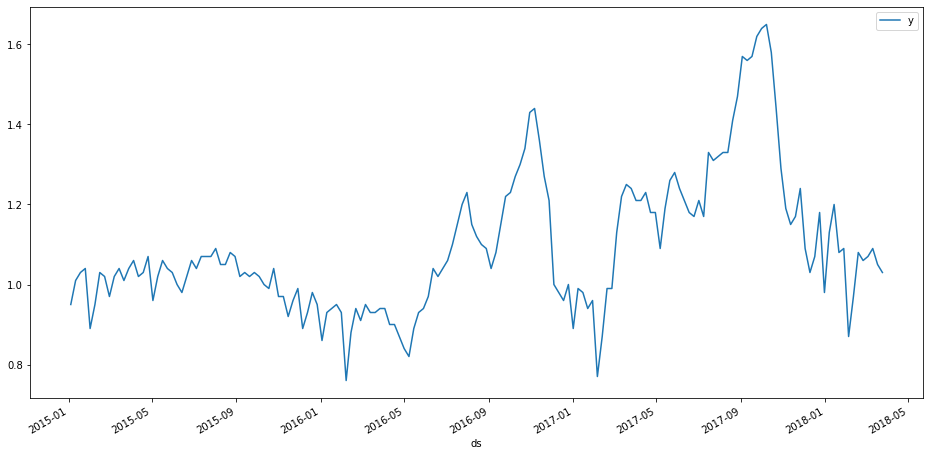

In [49]:
data.plot(x='ds', y='y', figsize=(16,8))    

## 가격예측하기 
- prophet라이브러리 참고 : https://zzsza.github.io/data/2019/02/06/prophet/

In [0]:
!pip install fbprophet # 라이브러리 설치하기
from fbprophet import Prophet   # 라이브러리 호출하기

### 모델 훈련하기 

In [66]:
model = Prophet()   # 모델 초기화하기
model.fit(data)     # 데이터 훈련시키기

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### 예측하기 

In [135]:
future = model.make_future_dataframe(periods=700)   # 예측기간 정하기
forecast = model.predict(future)    # 예측하기
df_info(forecast)   # 데이터프레임 살펴보기

          ds     trend  ...  multiplicative_terms_upper      yhat
0 2015-01-04  1.099075  ...                         0.0  0.983865
1 2015-01-11  1.095623  ...                         0.0  1.002533
2 2015-01-18  1.092171  ...                         0.0  0.998924
3 2015-01-25  1.088719  ...                         0.0  0.959442
4 2015-02-01  1.085267  ...                         0.0  0.903263

[5 rows x 16 columns] 

            ds     trend  ...  multiplicative_terms_upper      yhat
864 2020-02-19  1.140485  ...                         0.0  0.982228
865 2020-02-20  1.140380  ...                         0.0  0.991056
866 2020-02-21  1.140276  ...                         0.0  1.000066
867 2020-02-22  1.140172  ...                         0.0  1.009117
868 2020-02-23  1.140067  ...                         0.0  1.018071

[5 rows x 16 columns] 

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_u

In [137]:
forecast[(forecast.ds == '2020-01-01')]     # 데이터프레임 특정날짜 조회하기

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
815,2020-01-01,1.145599,0.817954,1.208167,0.989021,1.296819,-0.125402,-0.125402,-0.125402,-0.125402,-0.125402,-0.125402,0.0,0.0,0.0,1.020197


### 결과 그래프로 출력하기 

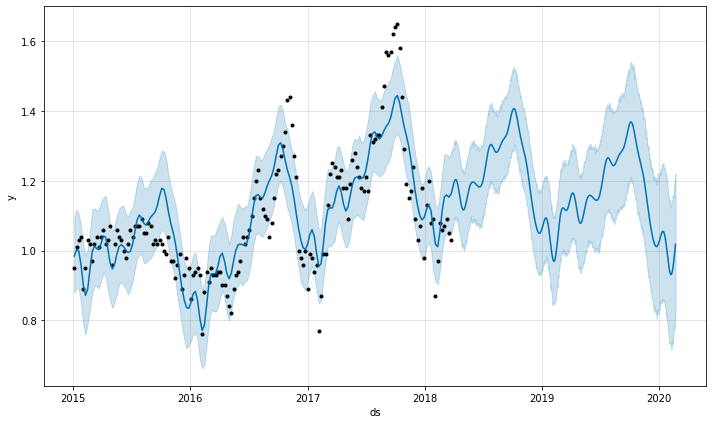

In [138]:
fig1 = model.plot(forecast)

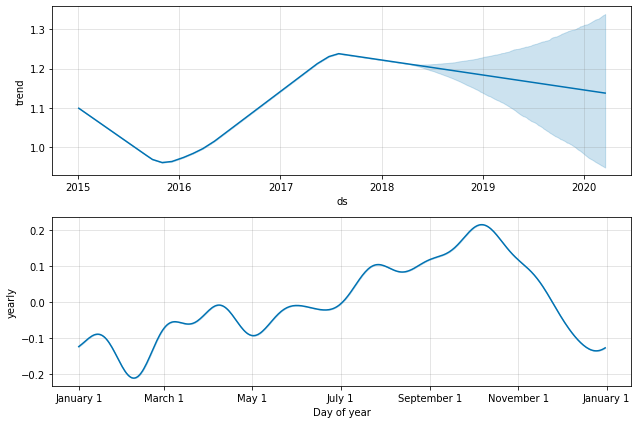

In [128]:
fig2 = model.plot_components(forecast)